# Load and imports

In [122]:
import pandas as pd

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df05ht = pd.read_csv('data_live_scores_full.csv', encoding='utf-8')
print(df05ht.shape)

(1155173, 37)


In [123]:
df05ht

,date,minute,homeTeam,awayTeam,goalHome,goalAway,shotsHome,shotsAway,crossesHome,crossesAway,...,fouls_c_home,fouls_c_away,fouls_won_home,fouls_won_away,offsides_home,offsides_away,tackles_home,tackles_away,result,match_id
0,2020-01-09,90+4:21,FC Barcelona,Club Atlético de Madrid,2.0,3.0,16.0,6.0,6.0,2.0,...,18.0,14.0,14.0,16.0,2.0,2.0,13.0,19.0,0,2020-01-09-FC Barcelona-Club Atlético de Madrid
1,2020-01-09,90+3:42,FC Barcelona,Club Atlético de Madrid,2.0,3.0,16.0,6.0,6.0,2.0,...,18.0,14.0,14.0,16.0,2.0,2.0,13.0,19.0,0,2020-01-09-FC Barcelona-Club Atlético de Madrid
2,2020-01-09,90+3:02,FC Barcelona,Club Atlético de Madrid,2.0,3.0,16.0,6.0,6.0,2.0,...,18.0,14.0,14.0,16.0,2.0,2.0,13.0,19.0,0,2020-01-09-FC Barcelona-Club Atlético de Madrid
3,2020-01-09,90+2:23,FC Barcelona,Club Atlético de Madrid,2.0,3.0,15.0,6.0,6.0,2.0,...,18.0,14.0,14.0,16.0,2.0,2.0,13.0,19.0,0,2020-01-09-FC Barcelona-Club Atlético de Madrid
4,2020-01-09,90+1:44,FC Barcelona,Club Atlético de Madrid,2.0,3.0,15.0,6.0,6.0,2.0,...,18.0,14.0,14.0,16.0,2.0,2.0,12.0,19.0,0,2020-01-09-FC Barcelona-Club Atlético de Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155168,2023-11-28,2:42,Ross County FC,Saint Mirren FC,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,2023-11-28-Ross County FC-Saint Mirren FC
1155169,2023-11-28,2:03,Ross County FC,Saint Mirren FC,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2023-11-28-Ross County FC-Saint Mirren FC
1155170,2023-11-28,1:24,Ross County FC,Saint Mirren FC,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2023-11-28-Ross County FC-Saint Mirren FC
1155171,2023-11-28,0:45,Ross County FC,Saint Mirren FC,0.0,NaN,0.0,NaN,1.0,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0,2023-11-28-Ross County FC-Saint Mirren FC


In [124]:
date_object = pd.to_datetime(df05ht['date'], format='%Y-%m-%d')

min_date = date_object.min()
max_date = date_object.max()

print("Os dados vão de {} até {}".format(min_date, max_date))

Os dados vão de 2020-01-08 00:00:00 até 2023-12-01 00:00:00


In [125]:
df05ht.columns

Index(['date', 'minute', 'homeTeam', 'awayTeam', 'goalHome', 'goalAway',
       'shotsHome', 'shotsAway', 'crossesHome', 'crossesAway', 'assistsHome',
       'assistsAway', 'blockedShotsHome', 'blockedShotsAway', 'league',
       'corners_home', 'corners_away', 'redcards_home', 'redcards_away',
       'shotsOffgoal_home', 'shotsOffgoal_away', 'shotsOngoal_home',
       'shotsOngoal_away', 'yellowcards_home', 'yellowcards_away',
       'passes_home', 'passes_away', 'fouls_c_home', 'fouls_c_away',
       'fouls_won_home', 'fouls_won_away', 'offsides_home', 'offsides_away',
       'tackles_home', 'tackles_away', 'result', 'match_id'],
      dtype='object')

# Analisando e tratando os dados

## Limpeza

In [126]:
df = df05ht.copy()
print(f'Dimensão do DataFrame antes remoção: {df05ht.shape}')
print(f'Valores únicos de minutos antes da conversão: {df05ht.minute.unique()} \n')
registros_duplicados = len(df05ht[df05ht.duplicated()])
print(f'Registros duplicados: {registros_duplicados}')
df.drop_duplicates(keep='last', inplace=True)

registros_nulos = df.isnull().sum().sum()
print(f'Registros nulos: {registros_nulos}\n')
df.dropna(inplace=True)

# Convertendo os minutos para inteiros
df['minute_converted'] = df05ht['minute'].str.extract('(\d+)').astype(int)

# Removendo os minutos iguais a 0
df = df[df['minute_converted'] != 0]

# removendo minutos > 45
df = df[df['minute_converted'] <= 45]

df['minute'] = df['minute_converted']
df.drop(columns=['minute_converted'], inplace=True)
# print(f'Jogos que serão retirados: {len(invalid_ids)}\n')

print(f'Dimensão do DataFrame após remoção: {df.shape}')
print(f'Total de registros retirados: {df05ht.shape[0] - df.shape[0]}')

Dimensão do DataFrame antes remoção: (1155173, 37)
Valores únicos de minutos antes da conversão: ['90+4:21' '90+3:42' '90+3:02' ... '33:55' '16:47' '5:22'] 

Registros duplicados: 70
Registros nulos: 39570

Dimensão do DataFrame após remoção: (566300, 37)
Total de registros retirados: 588873


In [127]:
df_copy = df.copy()

In [128]:
# df = df_copy.copy()

# janela_tempo = 10
# df.sort_values(by=['match_id', 'minute'], inplace=True) # ordenando por match_id e minuto

# # definindo janela de tempo após acontecimento do evento (gol casa ou fora)
# df_not_goal = df[(df['goalHome'] == 0) & (df['goalAway'] == 0)] # dataframe sem gol
# df_goal = df[df['goalHome'] + df['goalAway'] != 0] # dataframe com a ocorrencia do evento (gol)

# df = pd.concat([df_not_goal, df_goal], axis=0)

In [129]:
# abordagem para pegar eventos de gols em janela de tempo
df = df_copy.copy()

# Configurações iniciais
janela_tempo = 5

# Ordenando o DataFrame
df.sort_values(by=['match_id', 'minute'], inplace=True)

# Calculando a diferença no número de gols para identificar quando um gol é marcado
df['dif_gol_casa'] = df['goalHome'].diff().fillna(0)
df['dif_gol_fora'] = df['goalAway'].diff().fillna(0)

# Criando um dicionário para armazenar os minutos dos gols para cada partida
minutos_gols_por_partida = {}
for match_id in df['match_id'].unique():
    partida_atual = df[df['match_id'] == match_id]
    minutos_gols = partida_atual[(partida_atual['dif_gol_casa'] > 0) | (partida_atual['dif_gol_fora'] > 0)]['minute'].tolist()
    minutos_gols_por_partida[match_id] = minutos_gols

# Tratando duplicatas e marcando a janela de tempo em torno de cada gol
df = df.drop_duplicates(subset=['match_id', 'minute'], keep='last')
df['result'] = 0
for match_id, minutos in minutos_gols_por_partida.items():
    for minuto in minutos:
        inicio_janela = max(minuto - janela_tempo, 0)
        fim_janela = minuto
        df.loc[(df['match_id'] == match_id) & (df['minute'] >= inicio_janela) & (df['minute'] <= fim_janela), 'result'] = 1

df.drop(columns=['dif_gol_casa', 'dif_gol_fora'], inplace=True)

In [130]:
# # Iterar sobre cada match_id único.
# # Para cada partida, identificar o primeiro gol (se houver).
# # Registrar esses primeiros gols e, após processar todas as partidas, selecionar os últimos 10.
# # Marcar a janela de tempo para esses últimos 10 primeiros gols.

# df = df_copy.copy()

# # Configurações iniciais
# janela_tempo = 10
# # Ordenando o DataFrame por 'match_id' e 'minute'
# df.sort_values(by=['match_id', 'minute'], inplace=True)
# df.reset_index(drop=True, inplace=True)

# # Função para identificar os últimos 10 registros antes do primeiro gol em cada partida
# def marcar_ultimos_10_antes_do_gol(df):
#     # Identificando o índice do primeiro gol
#     primeiro_gol_idx = df[(df['goalHome'] > 0) | (df['goalAway'] > 0)].index.min()
#     # Verificando se existe um gol na partida
#     if pd.notna(primeiro_gol_idx):
#         # Calculando o índice inicial para marcar os 10 registros anteriores
#         inicio_intervalo = max(primeiro_gol_idx - 10, 0)
#         # Marcando os registros
#         df.loc[inicio_intervalo:primeiro_gol_idx, 'result'] = 1
#     return df

# # Aplicando a função a cada grupo de partida
# df = df.groupby('match_id').apply(marcar_ultimos_10_antes_do_gol)

# # df = df.drop_duplicates(subset=['match_id', 'minute'], keep='last')

In [131]:
df_trated = df.copy()

In [132]:
df[df['match_id'] == '2020-07-23-São Paulo FC-Red Bull Bragantino'].to_csv('data_teste.csv') # exemplo de como ficou

## Seleção de Ligas, Cálculo de Posse de Bola e Limpeza do DataFrame

In [133]:
# Calculando o tempo de posse de bola
total_passes = df['passes_away'] + df['passes_home']
df['possessiontime_away'] = round((df['passes_away'] / total_passes) * 100)
df['possessiontime_home'] = round((df['passes_home'] / total_passes) * 100)

df['possessiontime_home'].fillna(method='bfill', inplace=True)
df['possessiontime_away'].fillna(method='bfill', inplace=True)

print("\nDados de posse de bola:\n", df[['possessiontime_away', 'possessiontime_home']].head())

# Renomeando colunas
new_column_names = {'fouls_won_away': 'fouls_away', 'fouls_won_home': 'fouls_home'}
df.rename(columns=new_column_names, inplace=True)
print("\nColunas renomeadas:\n", df.columns)

# Removendo colunas desnecessárias e limpando o DataFrame
columns_to_drop = ["date", 'passes_home', 'passes_away', 'fouls_c_home', 'fouls_c_away','goalHome', 'goalAway', 'crossesHome', 'crossesAway', 'assistsHome',
       'assistsAway']
df.drop(columns=columns_to_drop, inplace=True)
print("\nDataFrame após remover colunas:\n", df.columns)

df.reset_index(drop=True, inplace=True)
print(f'Dimensão do DataFrame após modificações: {df.shape}')
df.isnull().sum()


Dados de posse de bola:
        possessiontime_away  possessiontime_home
14929                 93.0                  7.0
14927                 85.0                 15.0
14926                 87.0                 13.0
14924                 86.0                 14.0
14923                 87.0                 13.0

Colunas renomeadas:
 Index(['date', 'minute', 'homeTeam', 'awayTeam', 'goalHome', 'goalAway',
       'shotsHome', 'shotsAway', 'crossesHome', 'crossesAway', 'assistsHome',
       'assistsAway', 'blockedShotsHome', 'blockedShotsAway', 'league',
       'corners_home', 'corners_away', 'redcards_home', 'redcards_away',
       'shotsOffgoal_home', 'shotsOffgoal_away', 'shotsOngoal_home',
       'shotsOngoal_away', 'yellowcards_home', 'yellowcards_away',
       'passes_home', 'passes_away', 'fouls_c_home', 'fouls_c_away',
       'fouls_home', 'fouls_away', 'offsides_home', 'offsides_away',
       'tackles_home', 'tackles_away', 'result', 'match_id',
       'possessiontime_away', 'po

minute                 0
homeTeam               0
awayTeam               0
shotsHome              0
shotsAway              0
blockedShotsHome       0
blockedShotsAway       0
league                 0
corners_home           0
corners_away           0
redcards_home          0
redcards_away          0
shotsOffgoal_home      0
shotsOffgoal_away      0
shotsOngoal_home       0
shotsOngoal_away       0
yellowcards_home       0
yellowcards_away       0
fouls_home             0
fouls_away             0
offsides_home          0
offsides_away          0
tackles_home           0
tackles_away           0
result                 0
match_id               0
possessiontime_away    0
possessiontime_home    0
dtype: int64

## Tratando o formato das ligas para ligas existentes 

In [134]:
# Obtendo ligas únicas
leagues_opta = df['league'].unique()
print("Ligas únicas:", leagues_opta)

# Iterando através das ligas únicas
for league in leagues_opta:
    print("Liga atual:", league)

# Mapeamento de nomes de ligas
name_mapping = {
    'England - Premier League': 'England - Premier League',
    'Germany - Bundesliga': 'Germany - Bundesliga',
    'Spain - Primera División': 'Spain - La Liga',
    'France - Ligue 1': 'France - Ligue 1',
    'Italy - Serie A': 'Italy - Serie A',
    'USA - MLS': 'USA - Major League Soccer',
    'Brazil - Serie A': 'Brazil - Serie A',
    'Netherlands - Eredivisie': 'Netherlands - Eredivisie',
    'England - Championship': 'England - Championship',
    'Portugal - Primeira Liga': 'Portugal - Liga Portugal',
    'Romania - Liga I': 'Romania - Liga 1',
    "World - FIFA Women's World Cup": 'World - World Cup Women',
    'England - League One': 'England - League One',
    'England - League Two': 'England - League Two',
    'Europe - UEFA Europa Conference League': 'Europe - Europa Conference League',
    'England - League Cup': 'England - Carabao Cup',
    'Europe - UEFA Super Cup': 'Europe - Uefa Super Cup',
    'Europe - UEFA Champions League': 'Europe - Champions League',
    'Germany - DFB Pokal': 'Germany - DFB Pokal',
    'Italy - Coppa Italia': 'Italy - Coppa Italia',
    'Scotland - Premiership': 'Scotland - Premiership',
    'Germany - Super Cup': 'Germany - Super Cup',
    'South America - CONMEBOL Libertadores': 'South America - Copa Libertadores',
    'England - Community Shield': 'England - Community Shield',
    'N/C America - Concacaf Gold Cup': 'World - CONCACAF Gold Cup',
    'Europe - UEFA U21 Championship': 'Europe - Euro U21',
    'Australia - A-League Men': 'Australia - A-League',
    'Portugal - Play-offs 1/2': 'Portugal - Primeira Liga - Play-offs',
    'Europe - UEFA European Championship Qualifiers': 'Europe - Euro Qualification',
    'Germany - Play-offs 1/2': 'Germany - Bundesliga Play-offs',
    'Europe - UEFA Nations League': 'Europe - UEFA Nations League',
    'Europe - UEFA Europa League': 'Europe - Europa League',
    'England - FA Cup': 'England - FA Cup',
    'Spain - Copa del Rey': 'Spain - Copa Del Rey',
    'World - FIFA World Cup': 'World - FIFA World Cup',
    'France - Coupe de France': 'France - Coupe de France',
    'Spain - Super Cup': 'Spain - Super Cup',
    'Italy - Super Cup': 'Italy - Super Cup',
    'World - FIFA Club World Cup': 'World - FIFA Club World Cup',
    'Argentina - Liga Profesional Argentina': "Argentina - Superliga",
    'Brazil - Paulista A1': 'Brazil - Paulista A1',
    'Brazil - Copa do Brasil': 'Brazil - Copa Do Brasil',
    'Denmark - Superliga':'Denmark - Superliga',
    'Mexico - Liga MX': 'Mexico - Liga MX',
    'Greece - Super League 1': 'Greece - Super League',
    'Asia - AFC Champions League': 'Asia - AFC Champions League', 
    'South America - CONMEBOL Sudamericana': 'South America - Copa Sudamericana', 
    'Spain - Segunda División': 'Spain - La Liga 2',
    'Saudi Arabia - Saudi League': 'Saudi Arabia - Pro League',
    'Italy - Serie B': 'Italy - Serie B',
    'Japan - J1 League': 'Japan - J-League',
    'South America - CONMEBOL World Cup Qualifiers': 'World - WC Qualification South America',
    'Europe - UEFA World Cup Qualifiers': 'Europe - WC Qualification Europe', 
    "Europe - UEFA Women's Championship": "Europe - UEFA Women's EURO",
    "France - Trophée des Champions": 'France - Super Cup',
    'Brazil - Supercopa do Brasil': 'Brazil - Supercopa do Brasil',
    'South America - CONMEBOL Recopa': 'South America - Recopa Sudamericana',
    'Europe - UEFA European Championship': 'Europe - European Championship', 
    'N/C America - Leagues Cup': 'North & Central America - Leagues Cup',
    'South America - CONMEBOL Copa America': 'South America - Copa America',

}
print("\nTamanho do mapeamento de nomes de ligas:", len(name_mapping))

# Verificando o número de ligas únicas
print("Número de ligas únicas:", len(leagues_opta))
print("Número de ligas únicas após o mapeamento:", len(name_mapping))

# Atualizando os nomes das ligas no DataFrame
df['league'] = df['league'].replace(name_mapping)

# Verificando algumas linhas do DataFrame após a atualização dos nomes das ligas
# print("\nDataFrame após atualizar os nomes das ligas:\n", df['league'].unique())
for league in df['league'].unique():
    print("Liga atual no dataframe:", league)

Ligas únicas: ['Spain - Super Cup' 'South America - CONMEBOL Libertadores'
 'Asia - AFC Champions League' 'Brazil - Paulista A1'
 'South America - CONMEBOL Sudamericana' 'Brazil - Copa do Brasil'
 'Brazil - Supercopa do Brasil' 'South America - CONMEBOL Recopa'
 'Japan - J1 League' 'USA - MLS' 'Germany - Play-offs 1/2'
 'Mexico - Liga MX' 'Scotland - Premiership' 'Brazil - Serie A'
 'France - Ligue 1' 'Europe - UEFA Champions League'
 'England - Community Shield' 'England - League Cup'
 'Europe - UEFA Nations League' 'Greece - Super League 1'
 'Germany - DFB Pokal' 'Denmark - Superliga' 'England - Championship'
 'England - League One' 'England - League Two' 'England - Premier League'
 'Spain - Primera División' 'Netherlands - Eredivisie'
 'Spain - Segunda División' "Europe - UEFA Women's Championship"
 'Europe - UEFA Europa League' 'Germany - Bundesliga'
 'Portugal - Primeira Liga' 'Italy - Serie A' 'Europe - UEFA Super Cup'
 'Italy - Serie B' 'Germany - Super Cup'
 'South America - CO

## Balanceamento de Dados e Visualização da Distribuição de Resultados por Liga

Contando partidas por time...
Total de partidas: 7813

Filtrando dados de ligas...
Dados filtrados:

league
USA - Major League Soccer            24262
Brazil - Serie A                     18179
Argentina - Superliga                17955
England - Championship               16739
England - League One                 15659
England - League Two                 15345
Japan - J-League                     14168
Spain - La Liga 2                    13005
Mexico - Liga MX                     12105
South America - Copa Libertadores    10530
Spain - La Liga                       9900
Europe - Champions League             9810
Italy - Serie B                       9450
England - Premier League              9225
Italy - Serie A                       8955
Saudi Arabia - Pro League             8865
France - Ligue 1                      8865
Europe - Europa League                8819
Europe - UEFA Nations League          8775
Asia - AFC Champions League           8550
South America - Copa Sudamerican

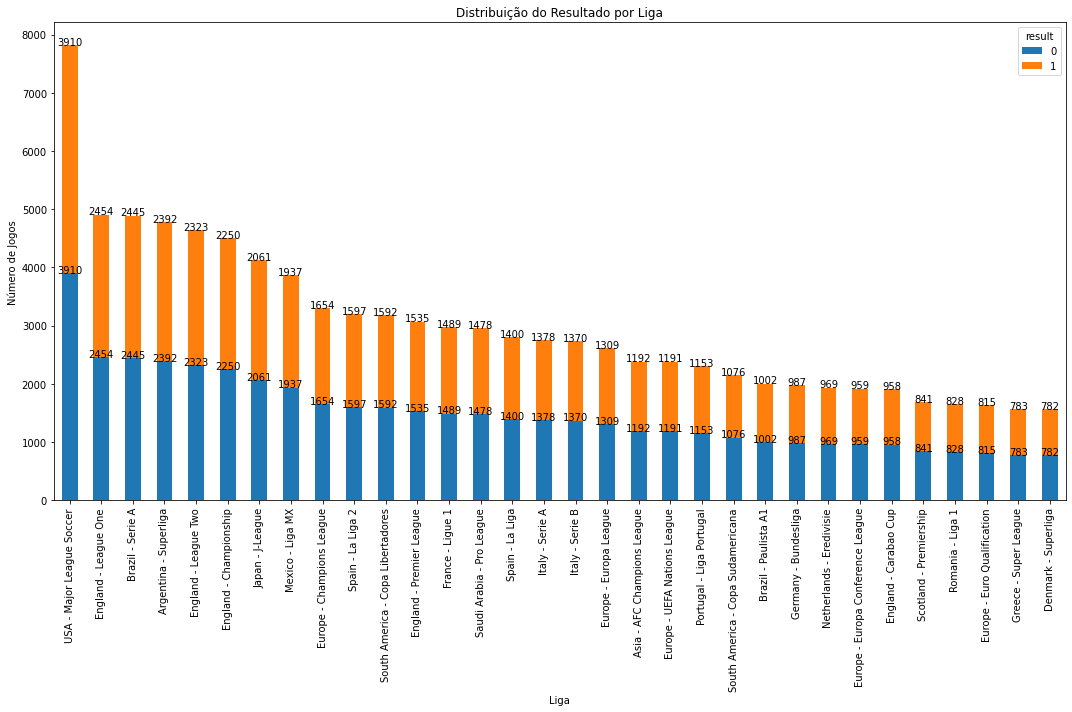

<Figure size 432x288 with 0 Axes>

In [135]:
# Função para filtrar ligas com base no número mínimo de partidas
def filter_leagues(df, league_col, matches, min_matches=100):
    # Agrupa o DataFrame por liga e conta o número único de partidas para cada liga
    league_game_counts = df.groupby(league_col)[matches].nunique()
    # Filtra para manter apenas as ligas com um número de partidas igual ou maior que min_matches
    leagues_filtered = league_game_counts[league_game_counts >= min_matches].index
    # Filtra o DataFrame original para incluir apenas linhas das ligas selecionadas
    filtered_data = df[df[league_col].isin(leagues_filtered)]
    return filtered_data

# Função para equilibrar o conjunto de dados com base na contagem de resultados em cada liga
def balance_data(df, league_col='league', result_col='result'):
    df = df.drop_duplicates()

    leagues = df[league_col].unique()
    # Lista para armazenar os DataFrames balanceados para cada liga
    balanced_dfs = []

    # Itera sobre cada liga para balancear os dados
    for league in leagues:
        # Filtra o DataFrame para incluir apenas dados da liga atual
        league_df = df[df[league_col] == league]

        # Conta o número de ocorrências de cada resultado na liga
        result_counts = league_df[result_col].value_counts()
        # Obtém o menor número de ocorrências entre os resultados
        min_count = result_counts.min()

        # Itera sobre os resultados únicos para balancear a quantidade de cada um
        for result in league_df[result_col].unique():
            # Define o tamanho da amostra com base no menor número de ocorrências
            sample_size = min(min_count, result_counts[result])
            # Coleta uma amostra aleatória de dados para o resultado atual
            sampled_df = league_df[league_df[result_col] == result].sample(sample_size, random_state=42)
            # Adiciona a amostra balanceada à lista
            balanced_dfs.append(sampled_df)

    # Combina todos os DataFrames balanceados em um único DataFrame
    balanced_data = pd.concat(balanced_dfs).reset_index(drop=True)

    return balanced_data



print("Contando partidas por time...")
total_matches_per_team = len(df['match_id'].unique())
print("Total de partidas:", total_matches_per_team)

print("\nFiltrando dados de ligas...")
filtered_data = filter_leagues(df, 'league', 'match_id')
print("Dados filtrados:\n")
print(filtered_data['league'].value_counts())

print("\nBalanceando dados...")
balanced_data = balance_data(filtered_data)
print("Dados balanceados:\n")
print(balanced_data['result'].value_counts())

league_distribution = balanced_data.groupby(['league', 'result']).size().unstack()
sorted_leagues = league_distribution.sum(axis=1).sort_values(ascending=False).head(100).index

print("Contando partidas depois dos filtros...")
total_matches_per_team = len(balanced_data['match_id'].unique())
print("Total de partidas:", total_matches_per_team)

plt.figure(figsize=(15, 10))
ax = league_distribution.loc[sorted_leagues].plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Distribuição do Resultado por Liga')
plt.ylabel('Número de Jogos')
plt.xlabel('Liga')
plt.tight_layout()
plt.xticks(rotation=90)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}', (x + width/2, y + height), ha='center')

plt.show()
plt.clf()  

In [136]:
balanced_data

,minute,homeTeam,awayTeam,shotsHome,shotsAway,blockedShotsHome,blockedShotsAway,league,corners_home,corners_away,...,fouls_home,fouls_away,offsides_home,offsides_away,tackles_home,tackles_away,result,match_id,possessiontime_away,possessiontime_home
0,2,CS Emelec,Clube Atlético Mineiro,0.0,0.0,0.0,0.0,South America - Copa Libertadores,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,2.0,0,2022-06-28-CS Emelec-Clube Atlético Mineiro,67.0,33.0
1,7,CD Universidad Católica,SC Internacional,2.0,2.0,0.0,1.0,South America - Copa Libertadores,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0,2020-10-23-CD Universidad Católica-SC Internac...,31.0,69.0
2,3,Millonarios FC SA,Clube Atlético Mineiro,0.0,0.0,0.0,0.0,South America - Copa Libertadores,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0,2023-03-09-Millonarios FC SA-Clube Atlético Mi...,46.0,54.0
3,18,América FC (Minas Gerais),CSD Independiente del Valle,3.0,2.0,1.0,0.0,South America - Copa Libertadores,1.0,0.0,...,2.0,0.0,2.0,0.0,2.0,1.0,0,2022-04-06-América FC (Minas Gerais)-CSD Indep...,42.0,58.0
4,28,Red Bull Bragantino,Club Estudiantes de La Plata,1.0,3.0,0.0,0.0,South America - Copa Libertadores,1.0,0.0,...,1.0,2.0,0.0,1.0,5.0,3.0,0,2022-05-17-Red Bull Bragantino-Club Estudiante...,38.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96215,3,Belarus,Switzerland,1.0,2.0,0.0,0.0,Europe - Euro Qualification,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,2023-03-25-Belarus-Switzerland,57.0,43.0
96216,9,Spain,Norway,1.0,0.0,1.0,0.0,Europe - Euro Qualification,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1,2023-03-25-Spain-Norway,8.0,92.0
96217,13,Finland,San Marino,4.0,1.0,2.0,0.0,Europe - Euro Qualification,0.0,0.0,...,3.0,0.0,1.0,0.0,1.0,3.0,1,2023-06-19-Finland-San Marino,20.0,80.0
96218,37,Slovenia,Northern Ireland,2.0,7.0,1.0,2.0,Europe - Euro Qualification,2.0,1.0,...,0.0,8.0,1.0,0.0,3.0,8.0,1,2023-09-07-Slovenia-Northern Ireland,52.0,48.0


In [137]:
# Ordenando o DataFrame
df.sort_values(by=['match_id', 'minute'], inplace=True)

In [138]:
balanced_data.to_csv("data_balanced.csv", index=False, encoding='utf-8')

In [139]:
balanced_data.value_counts('result')

result
0    48110
1    48110
Name: count, dtype: int64

In [140]:
df

,minute,homeTeam,awayTeam,shotsHome,shotsAway,blockedShotsHome,blockedShotsAway,league,corners_home,corners_away,...,fouls_home,fouls_away,offsides_home,offsides_away,tackles_home,tackles_away,result,match_id,possessiontime_away,possessiontime_home
0,1,Valencia CF,Real Madrid CF,0.0,0.0,0.0,0.0,Spain - Super Cup,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,2020-01-08-Valencia CF-Real Madrid CF,93.0,7.0
1,2,Valencia CF,Real Madrid CF,0.0,0.0,0.0,0.0,Spain - Super Cup,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,2020-01-08-Valencia CF-Real Madrid CF,85.0,15.0
2,3,Valencia CF,Real Madrid CF,0.0,1.0,0.0,0.0,Spain - Super Cup,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,2020-01-08-Valencia CF-Real Madrid CF,87.0,13.0
3,4,Valencia CF,Real Madrid CF,0.0,1.0,0.0,0.0,Spain - Super Cup,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0,2020-01-08-Valencia CF-Real Madrid CF,86.0,14.0
4,5,Valencia CF,Real Madrid CF,0.0,2.0,0.0,0.0,Spain - Super Cup,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0,2020-01-08-Valencia CF-Real Madrid CF,87.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351527,41,York City FC,Wigan Athletic FC,5.0,4.0,1.0,1.0,England - FA Cup,2.0,0.0,...,2.0,5.0,0.0,1.0,11.0,11.0,0,2023-12-01-York City FC-Wigan Athletic FC,57.0,43.0
351528,42,York City FC,Wigan Athletic FC,5.0,4.0,1.0,1.0,England - FA Cup,2.0,0.0,...,2.0,5.0,0.0,1.0,11.0,11.0,0,2023-12-01-York City FC-Wigan Athletic FC,59.0,41.0
351529,43,York City FC,Wigan Athletic FC,5.0,4.0,1.0,1.0,England - FA Cup,2.0,0.0,...,2.0,5.0,0.0,1.0,12.0,12.0,0,2023-12-01-York City FC-Wigan Athletic FC,59.0,41.0
351530,44,York City FC,Wigan Athletic FC,5.0,4.0,1.0,1.0,England - FA Cup,2.0,0.0,...,2.0,5.0,0.0,1.0,12.0,12.0,0,2023-12-01-York City FC-Wigan Athletic FC,59.0,41.0
